In [222]:
from scipy.integrate import odeint
from array import *
from scipy.optimize import curve_fit
import scipy.integrate as spi
from lmfit import minimize, Parameters, Model, fit_report
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import math
import pandas as pd
import seaborn as sns

%matplotlib inline


In [223]:
def PD_Model (Conc, E_base, E_max, IC50, Hill_Coeff):
    E = E_base + np.divide(np.multiply(E_max,np.power(Conc,Hill_Coeff)),(np.power(IC50, Hill_Coeff)+np.power(Conc,Hill_Coeff)))
    return E
PDModel = Model(PD_Model)

In [224]:
Data = [{'Tor':0, 'Ser':0, 'Res':0.0}]
Data.append({'Tor':0, 'Ser':0.63, 'Res':6.20})
Data.append({'Tor':0, 'Ser':1.25, 'Res':13.30})
Data.append({'Tor':0, 'Ser':2.5, 'Res':39.70})
Data.append({'Tor':0, 'Ser':5, 'Res':88.60})
Data.append({'Tor':0, 'Ser':10, 'Res':99.70})

Data.append({'Tor':0.31, 'Ser':0.0, 'Res':7.30})
Data.append({'Tor':0.31, 'Ser':0.63, 'Res':24.40})
Data.append({'Tor':0.31, 'Ser':1.25, 'Res':42.10})
Data.append({'Tor':0.31, 'Ser':2.5, 'Res':70.90})
Data.append({'Tor':0.31, 'Ser':5, 'Res':93.20})
Data.append({'Tor':0.31, 'Ser':10, 'Res':99.60})

Data.append({'Tor':0.63, 'Ser':0.0, 'Res':24.10})
Data.append({'Tor':0.63, 'Ser':0.63, 'Res':49.00})
Data.append({'Tor':0.63, 'Ser':1.25, 'Res':72.10})
Data.append({'Tor':0.63, 'Ser':2.5, 'Res':92.50})
Data.append({'Tor':0.63, 'Ser':5, 'Res':99.10})
Data.append({'Tor':0.63, 'Ser':10, 'Res':99.70})

Data.append({'Tor':1.25, 'Ser':0.0, 'Res':48.20})
Data.append({'Tor':1.25, 'Ser':0.63, 'Res':74.20})
Data.append({'Tor':1.25, 'Ser':1.25, 'Res':90.10})
Data.append({'Tor':1.25, 'Ser':2.5, 'Res':97.60})
Data.append({'Tor':1.25, 'Ser':5, 'Res':99.60})
Data.append({'Tor':1.25, 'Ser':10, 'Res':99.70})

Data.append({'Tor':2.5, 'Ser':0.0, 'Res':76.50})
Data.append({'Tor':2.5, 'Ser':0.63, 'Res':91.70})
Data.append({'Tor':2.5, 'Ser':1.25, 'Res':97.20})
Data.append({'Tor':2.5, 'Ser':2.5, 'Res':99.30})
Data.append({'Tor':2.5, 'Ser':5, 'Res':99.70})
Data.append({'Tor':2.5, 'Ser':10, 'Res':99.70})

Data.append({'Tor':5, 'Ser':0.0, 'Res':95.40})
Data.append({'Tor':5, 'Ser':0.63, 'Res':98.80})
Data.append({'Tor':5, 'Ser':1.25, 'Res':99.50})
Data.append({'Tor':5, 'Ser':2.5, 'Res':99.70})
Data.append({'Tor':5, 'Ser':5, 'Res':99.80})
Data.append({'Tor':5, 'Ser':10, 'Res':99.70})

In [225]:
Data_df = pd.DataFrame(Data)

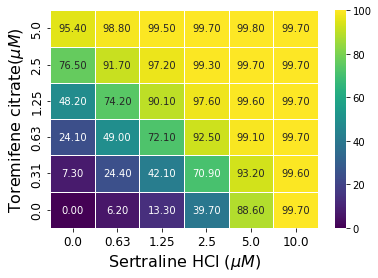

In [250]:
Data_plot = Data_df.pivot('Tor', 'Ser', 'Res')
ax1 = sns.heatmap(Data_plot, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1)
ax1.invert_yaxis()

ax1.set_ylabel("Toremifene citrate($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

## Model A:
#### Toremifene upstream
#### Sertraline downstream

In [228]:
Tor = Data_df.Tor.unique()
Ser = Data_df.Ser.unique()
UpstreamRes = np.asarray(Data_df[Data_df.Ser==0].Res/100)
Downstream_Isol = np.asarray(Data_df[Data_df.Tor==0].Res/100)
Downstream_Res=[]
for upConc in Tor[1:]:
    Downstream_Res.append((np.asarray(Data_df[Data_df.Tor == upConc].Res)-np.asarray(Data_df[(Data_df.Ser == 0)&(Data_df.Tor == upConc)].Res))/100)

In [229]:
 Downstream_Res

[array([0.   , 0.171, 0.348, 0.636, 0.859, 0.923]),
 array([0.   , 0.249, 0.48 , 0.684, 0.75 , 0.756]),
 array([0.   , 0.26 , 0.419, 0.494, 0.514, 0.515]),
 array([0.   , 0.152, 0.207, 0.228, 0.232, 0.232]),
 array([0.   , 0.034, 0.041, 0.043, 0.044, 0.043])]

In [230]:
PDModel.set_param_hint('E_base', value=0, vary = False)
PDModel.set_param_hint('E_max', value=0.5, min=0, max=1)
PDModel.set_param_hint('IC50', value=10, min=0, max=np.inf)
PDModel.set_param_hint('Hill_Coeff', value=3, min=0, max=np.inf)
params = PDModel.make_params()

In [231]:
result_Tor = PDModel.fit(UpstreamRes, params, Conc=Tor)
result_Ser_Isol = PDModel.fit(Downstream_Isol, params, Conc=Ser)

In [232]:
result_Tor

In [233]:
np.sum((result_Tor.best_fit-UpstreamRes)**2)

0.0015912329619520858

In [251]:
for i in range(0,6):
    if i==0:
        E_S_Isol = result_Ser_Isol.best_fit
        E_T = result_Tor.best_fit
    else:
        E_S_Isol = np.vstack((E_S_Isol,result_Ser_Isol.best_fit))
        E_T = np.vstack((E_T,result_Tor.best_fit))

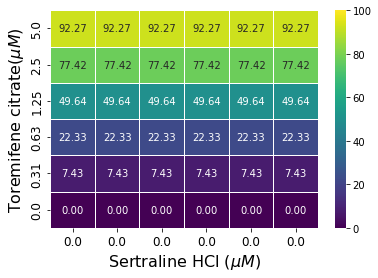

In [253]:
ax1 = sns.heatmap(E_T.T*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels = Tor, xticklabels = np.zeros(6))
ax1.invert_yaxis()
ax1.set_ylabel("Toremifene citrate($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [234]:
result_Ser_Isol

In [235]:
np.sum((result_Ser_Isol.best_fit-Downstream_Isol)**2)

0.00685162936090483

0.31
0.002871250663965398
0.63
0.00041873758130052277
1.25
0.00043249950298228433
2.5
0.00011478574863368641
5.0
2.1814304436132036e-05


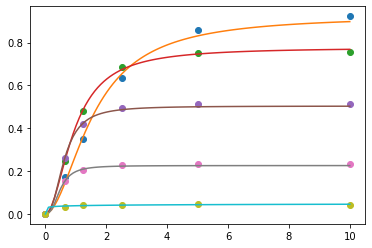

In [254]:
result_Ser=[]
IC50 =[1.58,0.89,0.64,0.48, 0.49]
Hill = [1.87,2.01,2.15,2.05, 2.025]
i=0
Ecombo = result_Ser_Isol.best_fit
E_S =  result_Ser_Isol.best_fit
for UpConc in Tor[1:]:
    print(UpConc)
    PDModel.set_param_hint('E_base', value=0, vary = False)
    PDModel.set_param_hint('IC50', value=IC50[i], min=0, max=np.inf)
    PDModel.set_param_hint('Hill_Coeff', value=Hill[i], min=0, max=np.inf)
    PDModel.set_param_hint('E_max', value=1-PDModel.eval(result_Tor.params, Conc = UpConc), min=0, max=1, vary=False)
    params = PDModel.make_params()
    Downstream_Res= ((np.asarray(Data_df[Data_df.Tor == UpConc].Res)-
                      np.asarray(Data_df[(Data_df.Ser == 0)&(Data_df.Tor == UpConc)].Res))/100)
    result_Ser.append(PDModel.fit(Downstream_Res, params, Conc=Ser))
    print(np.sum((result_Ser[-1].best_fit-Downstream_Res)**2))
    Ecombo = np.vstack((Ecombo, PDModel.eval(result_Ser[i].params, Conc = Ser)+PDModel.eval(result_Tor.params, Conc = UpConc)))
    E_S = np.vstack((E_S, result_Ser[-1].best_fit))
    plt.plot(Ser, Downstream_Res, 'o')
    plt.plot(np.linspace(Ser[0],Ser[-1], 100), PDModel.eval(result_Ser[i].params, Conc = np.linspace(Ser[0],Ser[-1], 100)))
    i=i+1
    

In [237]:
result_Ser[4]

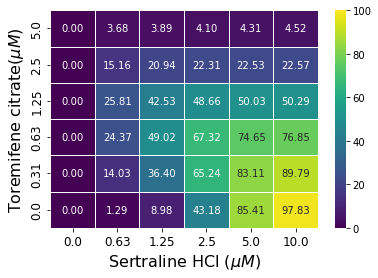

In [255]:
ax1 = sns.heatmap(E_S*100, vmin =0, vmax = 100, annot = True, fmt = '0.2f',cmap ='viridis', linewidth = 1, 
                  yticklabels = Tor, xticklabels =Ser)
ax1.invert_yaxis()
ax1.set_ylabel("Toremifene citrate($\mu M$)", fontsize=16)
ax1.tick_params(axis="y", labelsize = 12)
ax1.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 12)

In [238]:
Ecombo

array([[0.        , 0.01294972, 0.08982083, 0.43179376, 0.85405325,
        0.97829014],
       [0.07431654, 0.21464912, 0.43835876, 0.72667126, 0.90542947,
        0.97225179],
       [0.22327143, 0.46701574, 0.71350096, 0.89645343, 0.96977845,
        0.99181104],
       [0.49642075, 0.75452221, 0.92168509, 0.98297874, 0.99667555,
        0.99936508],
       [0.77423836, 0.92582825, 0.98367761, 0.99728975, 0.99957311,
        0.99993334],
       [0.92266484, 0.95945924, 0.96156023, 0.96368423, 0.96579409,
        0.96787736]])

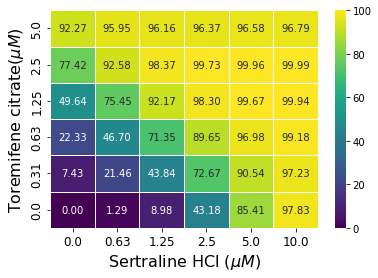

In [258]:
ax = sns.heatmap(Ecombo*100, vmin =0, vmax = 100, annot = True, fmt = '.2f', cmap ='viridis', linewidth = 1, 
                 yticklabels = Tor, xticklabels = Ser)
ax.invert_yaxis()
ax.set_ylabel("Toremifene citrate($\mu M$)", fontsize=16)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax.tick_params(axis="x", labelsize = 12)

In [240]:
Data_array= np.asarray(Data_plot)

In [241]:
np.sum((Data_array-Ecombo*100)**2)

188.80050615718116

In [244]:
np.sum((Data_array-np.mean(Data_array))**2)

38829.66305555555

In [245]:
1-np.sum((Data_array-Ecombo*100)**2)/np.sum((Data_array-np.mean(Data_array))**2)

0.9951377248397172

In [259]:
delta_E = Ecombo*100-np.minimum(100,(E_S_Isol*100+E_T.T*100))

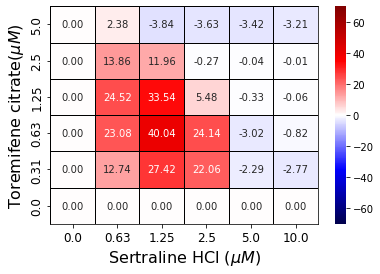

In [262]:
ax = sns.heatmap(delta_E, vmin =-70, vmax = 70, annot = True, fmt = '.2f', cmap ='seismic', linewidth = 0.5, 
                 linecolor = 'k', yticklabels = Tor, xticklabels = Ser)
ax.invert_yaxis()
ax.set_ylabel("Toremifene citrate($\mu M$)", fontsize=16)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Sertraline HCl ($\mu M$)', fontsize=16)
ax.tick_params(axis="x", labelsize = 12)
for _, spine in ax.spines.items(): 
    spine.set_visible(True) 
    spine.set_linewidth(0.75)

In [246]:
IC50_Ser = [2.744]
IC50_Ser_err = [0.227]
Hill_Ser = [2.945]
Hill_Ser_err = [0.608]
for i in range(0,len(Tor[1:])):
    IC50_Ser.append(result_Ser[i].params['IC50'].value)
    IC50_Ser_err.append(result_Ser[i].params['IC50'].stderr)
    Hill_Ser.append(result_Ser[i].params['Hill_Coeff'].value)
    Hill_Ser_err.append(result_Ser[i].params['Hill_Coeff'].stderr)

In [247]:
Hill_Ser_err

[0.608,
 0.14432213696016458,
 0.07907314878625803,
 0.22937828751102993,
 0.5067159588049648,
 0.05600836759248525]

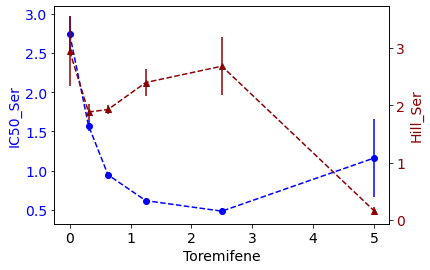

In [248]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx() 
ax1.errorbar(Tor, IC50_Ser, yerr = IC50_Ser_err, fmt =  '--o', color = 'b')
ax1.set_ylabel("IC50_Ser", color='b', fontsize=14)
ax1.tick_params(axis="y", labelcolor='b',labelsize = 14)
ax1.set_xlabel('Toremifene', fontsize=14)
ax1.tick_params(axis="x", labelsize = 14)
ax2.errorbar(Tor, Hill_Ser, yerr = Hill_Ser_err, fmt = '--^', color = 'darkred')
ax2.set_ylabel("Hill_Ser", color='darkred', fontsize=14)
ax2.tick_params(axis="y", labelcolor='darkred', labelsize = 14)

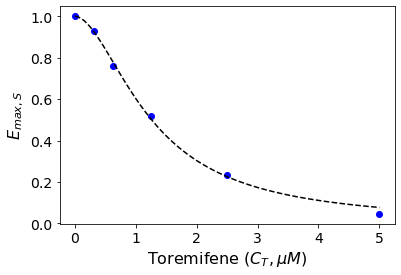

In [265]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.plot(Tor, 1-np.asarray(Data_df[(Data_df.Ser == 0)].Res)/100, 'o', color = 'b')
ax1.plot(np.linspace(Tor[0], Tor[-1], 100), 
         1-PDModel.eval(result_Tor.params, Conc = np.linspace(Tor[0], Tor[-1], 100)), '--', color = 'k')
ax1.set_ylabel("$E_{max,S}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Toremifene ($C_T, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [302]:
from sklearn.metrics import r2_score
r2_score(1-np.asarray(Data_df[(Data_df.Ser == 0)].Res)/100, 1-PDModel.eval(result_Tor.params, Conc = Tor))

0.9978405537443328

In [307]:
def exp(x, a, b, c):
    return a*np.exp(-b*(x))+c
exp_model = Model(exp)

exp_model.set_param_hint('a', value=1.5, min = 0, max = np.inf)
exp_model.set_param_hint('b', value=2, min=0, max=np.inf)
exp_model.set_param_hint('c', value=2.5, min=0, max=np.inf)


params = exp_model.make_params()

IC50_S = exp_model.fit(IC50_Ser, params, x = Tor, weights = 1.0/np.asarray(IC50_Ser_err))
IC50_S_NW = exp_model.fit(IC50_Ser, params, x = Tor)

In [279]:
IC50_S

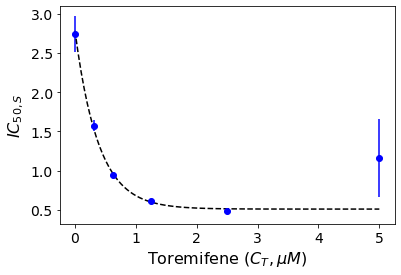

In [309]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Tor, IC50_Ser, yerr = IC50_Ser_err, fmt =  'o', color = 'b')
ax1.plot(np.linspace(Tor[0], Tor[-1], 100), 
         exp_model.eval(IC50_S.params, x=np.linspace(Tor[0], Tor[-1], 100)), '--', color = 'k')
ax1.set_ylabel("$IC_{50,S}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Toremifene ($C_T, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [283]:
from sklearn.metrics import r2_score
r2_score(IC50_Ser, exp_model.eval(IC50_S.params, x=Tor), sample_weight= 1.0/np.asarray(IC50_Ser_err))

0.9696078053048542

In [303]:
def binomial(x, a, b, c, d):
    return a*x+b*x**2+c*x**3+d
binomial_model = Model(binomial)

binomial_model.set_param_hint('a', value=-2, min = -np.inf, max = 0)
binomial_model.set_param_hint('b', value=0.2, min=0, max=np.inf)
binomial_model.set_param_hint('c', value=-1, min=-np.inf, max=0)
binomial_model.set_param_hint('d', value=6, min=0, max=np.inf)
params = binomial_model.make_params()

Hill_S = binomial_model.fit(Hill_Ser, params, x =Tor, weights = 1.0/np.asarray(Hill_Ser_err) )
Hill_S_NW = binomial_model.fit(Hill_Ser, params, x =Tor )

In [306]:
Hill_S_NW

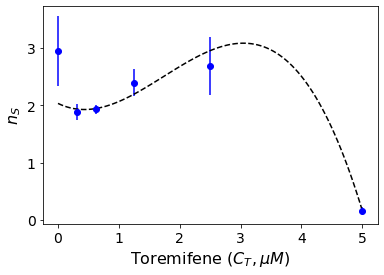

In [310]:
fig, ax1 = plt.subplots(figsize=(6, 4))
ax1.errorbar(Tor, Hill_Ser, yerr = Hill_Ser_err, fmt =  'o', color = 'b')
ax1.plot(np.linspace(Tor[0], Tor[-1], 100), 
         binomial_model.eval(Hill_S.params, x=np.linspace(Tor[0], Tor[-1], 100)), '--', color = 'k')
ax1.set_ylabel("$n_{S}$", fontsize=16)
ax1.tick_params(axis="y", labelsize = 14)
ax1.set_xlabel('Toremifene ($C_T, \mu M$)', fontsize=16)
ax1.tick_params(axis="x", labelsize = 14)

In [301]:
from sklearn.metrics import r2_score
r2_score(Hill_Ser, binomial_model.eval(Hill_S.params, x=Tor), sample_weight= 1.0/np.asarray(Hill_Ser_err))

0.9608503827386545

In [305]:
r2_score(Hill_Ser, binomial_model.eval(Hill_S_NW.params, x=Tor))

0.922276497751831